# **EDA_Breast_Cancer_Survival**
# **By Amit Kharche**
### **Follow me** on [Linkedin](https://www.linkedin.com/in/amit-kharche) and [Medium](https://medium.com/@amitkharche14) for more insights on **Data Science** and **Artificial intelligence (AI)**

---
# **Table of Contents**
---

**1.** [**Introduction**](#Section1)<br>
**2.** [**Problem Statement**](#Section2)<br>
**3.** [**Installing & Importing Libraries**](#Section3)<br>
  - **3.1** [**Installing Libraries**](#Section31)<br>
  - **3.2** [**Upgrading Libraries**](#Section32)<br>
  - **3.3** [**Importing Libraries**](#Section33)<br>

**4.** [**Data Acquisition & Description**](#Section4)<br>
**5.** [**Data Pre-Profiling**](#Section5)<br>
**6.** [**Data Pre-Processing**](#Section6)<br>
**7.** [**Data Post-Profiling**](#Section7)<br>
**8.** [**Exploratory Data Analysis**](#Section8)<br>
  - [**8.1 What is the age distribution of patients?**](#Section81)<br>
  - [**8.2 How are patients distributed across operation years?**](#Section82)<br>
  - [**8.3 What is the distribution of positive axillary nodes?**](#Section83)<br>
  - [**8.4 What is the survival status distribution?**](#Section84)<br>
  - [**8.5 How does age vary across survival status?**](#Section85)<br>
  - [**8.6 How do positive axillary nodes vary across survival status?**](#Section86)<br>
  - [**8.7 What is the average survival rate across operation years?**](#Section87)<br>
  - [**8.8 Is there a correlation among numeric features?**](#Section88)<br>
  - [**8.9 What is the joint distribution of age and positive nodes?**](#Section89)<br>
  - [**8.10 How does survival status vary by age group?**](#Section810)<br>
  - [**8.11 What is the count of patients with zero positive nodes by survival?**](#Section811)<br>
  - [**8.12 Is there an age trend in node positivity?**](#Section812)<br>

**9.** [**Summarization**](#Section9)</br>
  - 9.1 [**Conclusion**](#Section91)</br>
  - 9.2 [**Actionable Insights**](#Section91)</br>

---
<a name = Section1></a>
# **1. Introduction**
---
**Breast cancer** remains one of the most **prevalent** and **life-threatening** diseases affecting women across the globe. Its early **detection** and **treatment** significantly improve patient outcomes. The dataset under analysis comprises **306 patient records**, each detailing:

* **Age** of the patient
* **Years of operation**
* **Number of positive axillary lymph nodes detected**
* **Survival status** (1 = survived 5 years or longer, 2 = died within 5 years)

This **Exploratory Data Analysis (EDA)** aims to uncover **statistical patterns**, **trends**, and **relationships** within these variables. By analyzing the distribution and interactions of these attributes, we seek to derive **meaningful insights** that can assist **clinicians**, **healthcare researchers**, and **policy makers**. These insights could serve as a foundation for developing **predictive models** or for enhancing **data-driven decision-making** in breast cancer prognosis.

---

---
<a name = Section2></a>
# **2. Problem Statement**
---
The main goal of this EDA is to **analyze survival outcomes** of breast cancer patients based on key clinical features. With the rise in breast cancer cases, identifying **factors that significantly influence survival** is crucial for effective **diagnosis**, **treatment planning**, and **patient management**.

This analysis will investigate how **patient age**, **operation year**, and **positive lymph node count** relate to **5-year survival status**. We aim to:

* Identify **data distributions** and **outliers**
* Examine **correlations** between features
* Discover **patterns** in survival outcomes

Through this, we intend to uncover **prognostic indicators** that can aid in building **machine learning models** or **clinical risk stratification tools**. Ultimately, the insights derived will support **evidence-based strategies** to enhance patient outcomes and allocate **healthcare resources** more effectively.

---
<a id = Section3></a>
# **3. Installing & Importing Libraries**
---

- This section is emphasised on installing and importing the necessary libraries that will be required.

<a name = Section31></a>
### **3.1 Installing Libraries**

In [1]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install ydata_profiling

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = Section32></a>
### **3.2 Upgrading Libraries**

- **After upgrading** the libraries, you need to **restart the runtime** to make the libraries in sync.

- Make sure not to execute the cell under Installing Libraries and Upgrading Libraries again after restarting the runtime.

In [2]:
!pip install -q --upgrade datascience                               # Package that is required by pandas profiling
!pip install -q --upgrade pandas-profiling                          # Library to generate basic statistics about data
!pip install ydata-profiling

ERROR: Invalid requirement: '#'
ERROR: Invalid requirement: '#'


<a name = Section33></a>
### **3.3 Importing Libraries**

- You can headstart with the basic libraries as imported inside the cell below.

- If you want to import some additional libraries, feel free to do so.


In [3]:
# -------------------------------------------------------------------------------------------------------------------------------
import pandas as pd  # Importing for panel data analysis
from ydata_profiling import ProfileReport  # To perform data profiling

# Pandas display settings to reveal all rows, columns, and values
pd.set_option('display.max_columns', None)      # Show all columns
pd.set_option('display.max_colwidth', None)     # Show full column content
pd.set_option('display.max_rows', None)         # Show all rows
pd.set_option('mode.chained_assignment', None)  # Disable chained assignment warnings
# -------------------------------------------------------------------------------------------------------------------------------
import numpy as np  # For numerical operations
# -------------------------------------------------------------------------------------------------------------------------------
import plotly.graph_objs as go  # For interactive visualizations
# -------------------------------------------------------------------------------------------------------------------------------
import warnings  # Suppress runtime warnings
warnings.filterwarnings("ignore")
# -------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt  # Pyplot for static plotting
import seaborn as sns  # Seaborn for statistical data visualization

# Enable inline plotting in Jupyter Notebook
%matplotlib inline

---
<a name = Section4></a>
# **4. Data Acquisition & Description**
---
* This section focuses on understanding the dataset's structure and the meaning of each feature collected for analysis.

* The data originates from a **breast cancer survival study**, containing **306 patient records**. Each entry corresponds to a patient’s post-operative attributes and **5-year survival status**.

* The dataset combines **demographic data** and **clinical observations** to help assess prognosis outcomes.

* Below is the detailed description of each feature in the dataset:

|  Id | Feature              | Description                                                                       |
| :-: | :------------------- | :-------------------------------------------------------------------------------- |
|  01 | Age                  | Age of the patient at the time of surgery (in years)                              |
|  02 | Years\_of\_operation | The year when the operation was performed (last two digits, e.g., '64' for 1964)  |
|  03 | Pos\_axillary\_nodes | Number of positive axillary lymph nodes detected (indicative of cancer spread)    |
|  04 | Status               | Patient survival status (1 = survived 5 years or longer, 2 = died within 5 years) |

* **Note**: The dataset contains no missing values and all features are **numerical**. The `Status` column is **categorical**, representing the classification target for survival prediction models.

* This dataset is suitable for **classification modeling**, **survival analysis**, and understanding the **impact of lymph node involvement** and age on breast cancer prognosis.

---

In [4]:
data = pd.read_csv(filepath_or_buffer = 'https://raw.githubusercontent.com/amitkharche/exploratory_data_analysis_projects_amit_kharche/refs/heads/main/EDA_Breast_Cancer_Survival_amit_kharche/breast_cancer_survival.csv')
print('Data Shape:', data.shape)
data.head()

Data Shape: (306, 4)


,Age,Years_of_operation,Pos_axillary_nodes,Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### **Data Description**

- To get some quick description out of the data you can use describe method defined in pandas library.

In [5]:
data.describe()

,Age,Years_of_operation,Pos_axillary_nodes,Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,1.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,1.000000
25%,44.000000,60.000000,0.000000,1.000000
50%,52.000000,63.000000,1.000000,1.000000
75%,60.750000,65.750000,4.000000,2.000000
max,83.000000,69.000000,52.000000,2.000000


### **Data Information**

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 306 non-null    int64
 1   Years_of_operation  306 non-null    int64
 2   Pos_axillary_nodes  306 non-null    int64
 3   Status              306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


---
<a name = Section5></a>
# **5. Data Pre-Profiling**
---

- This section is emphasised on getting a report about the data.

- You need to perform pandas profiling and get some observations out of it...

In [7]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Pre_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<00:00,  7.00it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


---
<a name = Section6></a>
# **6. Data Pre-Processing**
---

- This section is emphasised on performing data manipulation over unstructured data for further processing and analysis.

- To modify unstructured data to strucuted data you need to verify and manipulate the integrity of the data by:
  - Handling missing data,

  - Handling redundant data,

  - Handling inconsistent data,

  - Handling outliers,

  - Handling typos

In [8]:
data.isnull().sum().sort_values(ascending= False)

Age                   0
Years_of_operation    0
Pos_axillary_nodes    0
Status                0
dtype: int64

In [9]:
data.dtypes

Age                   int64
Years_of_operation    int64
Pos_axillary_nodes    int64
Status                int64
dtype: object

In [10]:
data.columns = map(str.lower, data.columns)

In [15]:
data.dtypes

age                   int64
years_of_operation    int64
pos_axillary_nodes    int64
status                int64
dtype: object

In [11]:
data.duplicated().sum()

17

In [12]:
{col: data[col].unique() for col in data.columns}

{'age': array([30, 31, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47,
        48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64,
        65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 83],
       dtype=int64),
 'years_of_operation': array([64, 62, 65, 59, 58, 60, 66, 61, 67, 63, 69, 68], dtype=int64),
 'pos_axillary_nodes': array([ 1,  3,  0,  2,  4, 10,  9, 30,  7, 13,  6, 15, 21, 11,  5, 23,  8,
        20, 52, 14, 19, 16, 12, 24, 46, 18, 22, 35, 17, 25, 28],
       dtype=int64),
 'status': array([1, 2], dtype=int64)}

In [17]:
# Calculate IQR bounds
Q1 = data['pos_axillary_nodes'].quantile(0.25)
Q3 = data['pos_axillary_nodes'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the data to exclude outliers
data = data[(data['pos_axillary_nodes'] >= lower_bound) & (data['pos_axillary_nodes'] <= upper_bound)]

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 266 entries, 0 to 305
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 266 non-null    int64
 1   years_of_operation  266 non-null    int64
 2   pos_axillary_nodes  266 non-null    int64
 3   status              266 non-null    int64
dtypes: int64(4)
memory usage: 10.4 KB


### Observation
1. No missing values were found in any column, the data is complete.
2. All features (`age`, `years_of_operation`, `pos_axillary_nodes`, `status`) are numeric (`int64`).
3. Column names were standardized to lowercase for consistency.
4. 17 duplicate rows were found and should be removed to avoid bias.
5. No inconsistent values detected; all unique entries are logically valid.
6. Outliers in `pos_axillary_nodes` were removed, reducing the dataset to **266 clean records**.


---
<a name = Section7></a>
# **7. Data Post-Profiling**
---

- This section is emphasised on getting a report about the data after the data manipulation.

- You may end up observing some new changes, so keep it under check and make right observations.

In [19]:
from pandas_profiling import ProfileReport

# Generate the profile report
profile = ProfileReport(data, title="Profile Report", explorative=True)

# Save the report as HTML
profile.to_file("Post_Profiling_Report.html")

print("Profiling report saved successfully!")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 4/4 [00:00<?, ?it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Profiling report saved successfully!


---
<a name = Section8></a>
# **8. Exploratory Data Analysis**
---

- This section is emphasised on asking the right questions and perform analysis using the data.

- Note that there is no limit how deep you can go, but make sure not to get distracted from right track.

<a name = Section81></a>
**8.1. What is the age distribution of patients?**

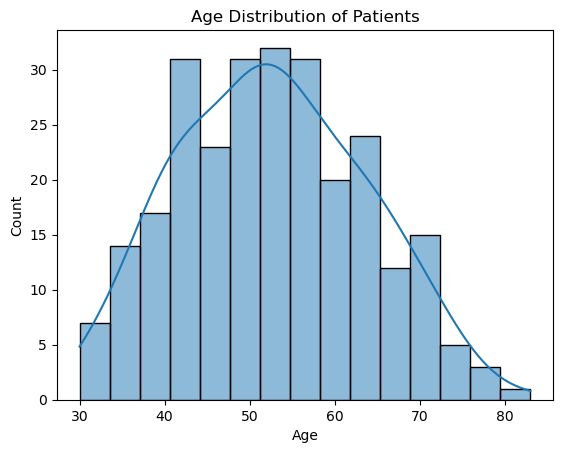

In [20]:
sns.histplot(data['age'], bins=15, kde=True)
plt.title('Age Distribution of Patients')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

### Observation

- The **age distribution** of patients is approximately **bell-shaped**, indicating a **normal distribution** centered around **50–55 years**.  
- Most patients fall in the **40 to 65 age range**, showing that breast cancer surgeries are more common in **middle-aged individuals**.  
- A small number of patients are at the **extremes of age** (below 35 or above 75), highlighting the **rarity of cases** in younger or older age groups.

<a name = Section82></a>
**8.2. How are patients distributed across operation years?**

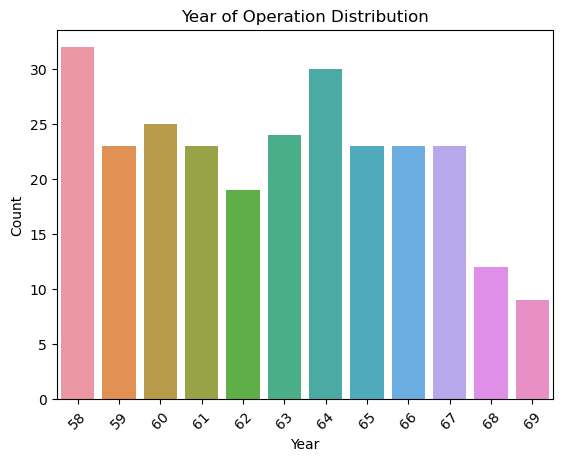

In [21]:
sns.countplot(x='years_of_operation', data=data)
plt.title('Year of Operation Distribution')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

### Observation

- The **year of operation distribution** shows the **highest number of surgeries** occurred in **1958 and 1964**, indicating peaks in those years.  
- There is a **gradual decline** in patient surgeries from **1965 to 1969**, reflecting a potential shift in data availability or patient intake.  
- Overall, the dataset reflects a **broad distribution** of operations over the **12-year span** from 1958 to 1969, with relatively **even spread** in earlier years.


<a name = Section83></a>
**8.3. What is the distribution of positive axillary nodes?**

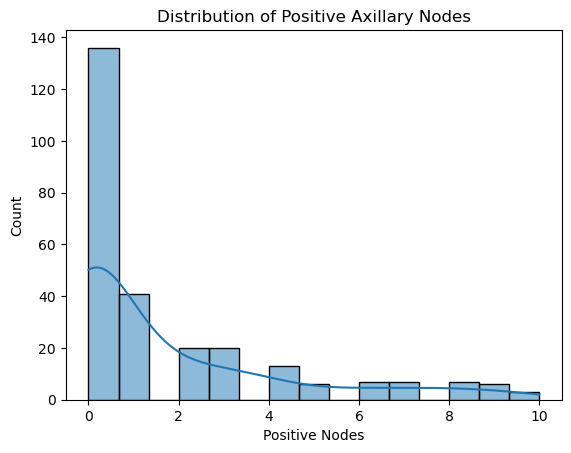

In [22]:
sns.histplot(data['pos_axillary_nodes'], bins=15, kde=True)
plt.title('Distribution of Positive Axillary Nodes')
plt.xlabel('Positive Nodes')
plt.ylabel('Count')
plt.show()

### Observation

- The distribution of **positive axillary lymph nodes** is highly **right-skewed**, with the majority of patients having **zero or one** positive node.  
- A sharp drop is observed after 1–2 nodes, indicating that **most cases involve limited lymph node involvement**, likely reflecting early-stage detection.  
- The presence of a **long tail** with some patients showing up to **10 or more** positive nodes suggests a few **advanced-stage cases** within the dataset.


<a name = Section84></a>
**8.4. What is the survival status distribution?**

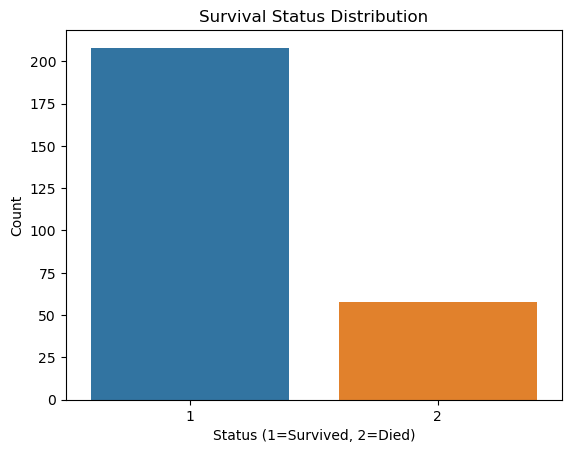

In [24]:
sns.countplot(x='status', data=data)
plt.title('Survival Status Distribution')
plt.xlabel('Status (1=Survived, 2=Died)')
plt.ylabel('Count')
plt.show()

### Observation

- The **survival status distribution** reveals a significantly higher number of patients who **survived 5 years or more** (Status = 1) compared to those who did not (Status = 2).  
- Around **three-quarters of the patients** belong to the survived category, indicating a **positive overall prognosis** in this dataset.  
- This class imbalance suggests a need to **consider stratification or balancing techniques** in any predictive modeling efforts.


<a name = Section85></a>
**8.5. How does age vary across survival status?**

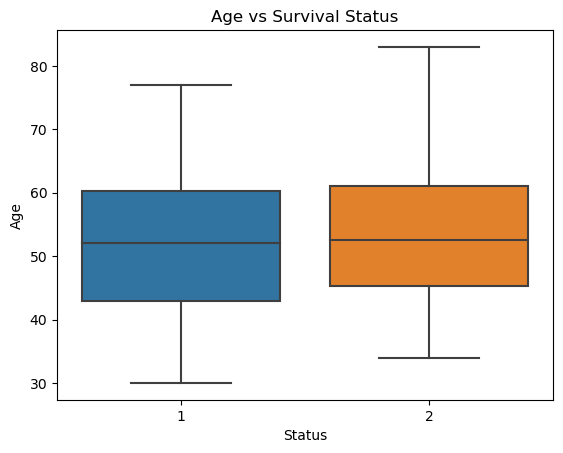

In [25]:
sns.boxplot(x='status', y='age', data=data)
plt.title('Age vs Survival Status')
plt.xlabel('Status')
plt.ylabel('Age')
plt.show()

### Observation

- The **age distribution across survival status** is fairly similar, with **median ages** around the early 50s for both groups.  
- The interquartile range (IQR) and spread are also comparable, indicating that **age may not be a strong differentiator** for survival outcome.  
- Both groups include outliers and elderly patients, showing that **age alone does not distinctly influence survival**, suggesting other clinical factors may play a more pivotal role.


<a name = Section86></a>
**8.6. How do positive axillary nodes vary across survival status?**

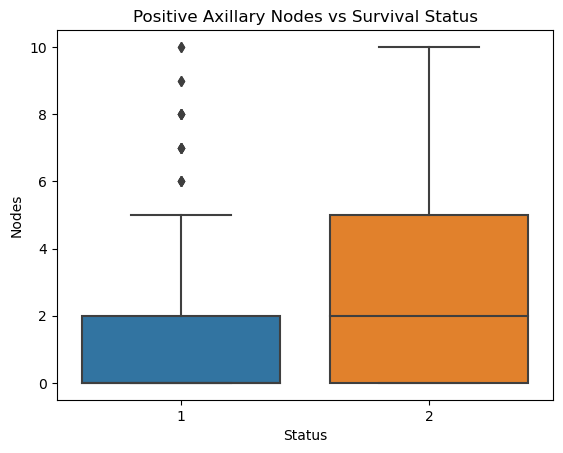

In [26]:
sns.boxplot(x='status', y='pos_axillary_nodes', data=data)
plt.title('Positive Axillary Nodes vs Survival Status')
plt.xlabel('Status')
plt.ylabel('Nodes')
plt.show()

### Observation

- Patients who **survived 5 years or more** (Status = 1) generally had **fewer positive axillary nodes**, with many showing **zero involvement**.  
- Those who **did not survive** (Status = 2) exhibited a **wider range and higher median** of positive nodes, indicating **more severe disease progression**.  
- This suggests a strong **negative correlation between node count and survival**, making **positive axillary nodes a key prognostic indicator** in breast cancer outcomes.


<a name = Section87></a>
**8.7. What is the average survival rate across operation years?**

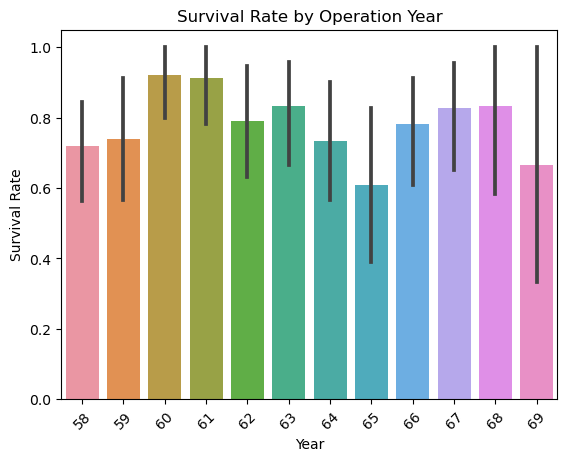

In [27]:
sns.barplot(x='years_of_operation', y='status', data=data, estimator=lambda x: sum(x==1)/len(x))
plt.title('Survival Rate by Operation Year')
plt.xlabel('Year')
plt.ylabel('Survival Rate')
plt.xticks(rotation=45)
plt.show()

### Observation

- **Survival rates** vary across operation years, with the **highest rates** observed in **1960 and 1961**, both exceeding **90%**.  
- Years like **1965 and 1969** exhibit relatively **lower survival rates**, suggesting potential variations in treatment effectiveness or patient profiles.  
- Despite fluctuations, the survival rate remains **consistently above 60%**, indicating generally **positive outcomes** throughout the decade of surgeries.


<a name = Section88></a>
**8.8. Is there a correlation among numeric features?**

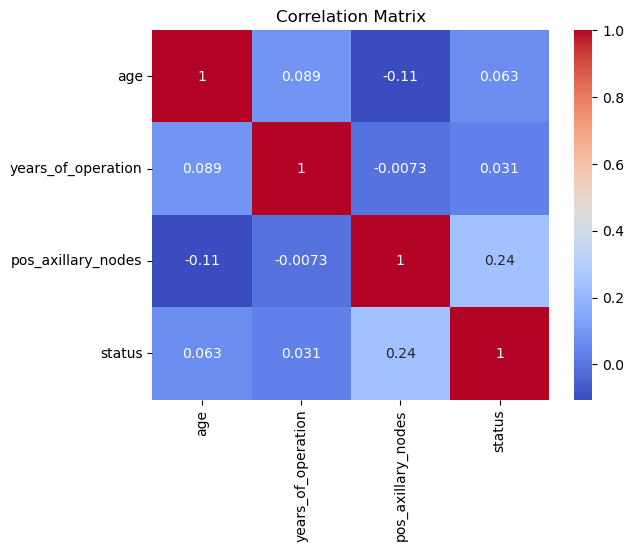

In [28]:
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### Observation

- The **correlation matrix** shows a **weak positive correlation (0.24)** between `pos_axillary_nodes` and `status`, suggesting that **higher node counts are associated with lower survival**.  
- Other features like `age` and `years_of_operation` have **very low or negligible correlation** with survival status, implying **limited direct impact**.  
- Overall, the matrix confirms that **positive axillary nodes** is the most **informative feature** for predicting patient outcomes in this dataset.


<a name = Section89></a>
**8.9. What is the joint distribution of age and positive nodes?**

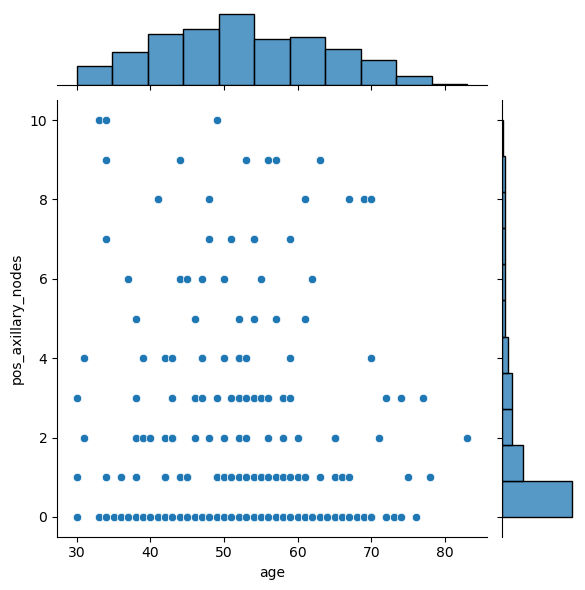

In [29]:
sns.jointplot(x='age', y='pos_axillary_nodes', data=data, kind='scatter')
plt.show()

### Observation

- The **joint distribution** of `age` and `pos_axillary_nodes` reveals a **high concentration of patients with zero node involvement** across nearly all age groups.  
- Patients with **higher node counts** are spread across a **broad age range**, indicating **no clear linear relationship** between age and lymph node positivity.  
- The marginal histograms reaffirm that while **node count is often low**, **age follows a normal-like distribution**, making age a **less decisive factor** in node involvement.


<a name = Section810></a>
**8.10. How does survival status vary by age group?**

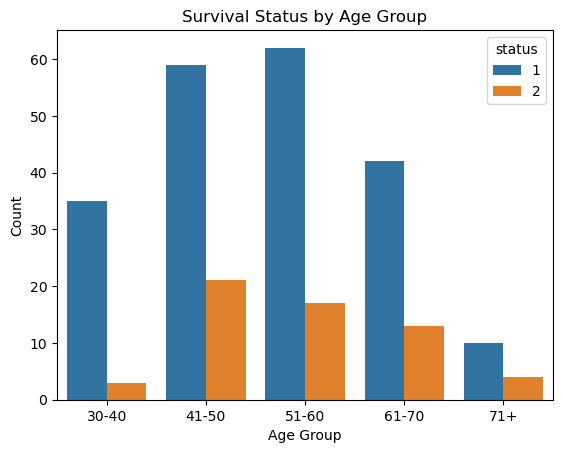

In [30]:
data['age_group'] = pd.cut(data['age'], bins=[29, 40, 50, 60, 70, 85], labels=['30-40','41-50','51-60','61-70','71+'])
sns.countplot(x='age_group', hue='status', data=data)
plt.title('Survival Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.show()

### Observation

- Across all **age groups**, patients who **survived (Status = 1)** significantly outnumber those who did not, indicating a **consistently high survival rate**.  
- The **41–60 age range** has the **highest survival counts**, possibly reflecting better treatment response or fewer comorbidities in this group.  
- The **71+ age group** shows a smaller count but still a favorable survival proportion, suggesting **age alone isn't a dominant survival predictor**.


<a name = Section811></a>
**8.11. What is the count of patients with zero positive nodes by survival?**

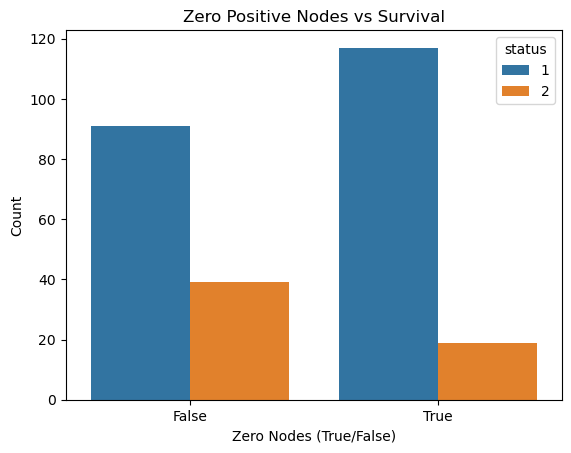

In [33]:
# Create a new column to store whether the patient has zero positive axillary nodes
data['zero_nodes'] = data['pos_axillary_nodes'] == 0

# Plot count of zero vs non-zero nodes, split by survival status
sns.countplot(x='zero_nodes', hue='status', data=data)
plt.title('Zero Positive Nodes vs Survival')
plt.xlabel('Zero Nodes (True/False)')
plt.ylabel('Count')
plt.show()

### Observation

- Patients with **zero positive axillary nodes** (True) show a significantly **higher survival rate**, reinforcing node negativity as a **strong survival indicator**.  
- Those with **one or more nodes** (False) have a higher proportion of non-survivors, highlighting the **adverse impact of lymph node involvement**.  
- This contrast clearly supports the clinical insight that **node status is crucial** in predicting **breast cancer prognosis**.


<a name = Section812></a>
**8.12. Is there an age trend in node positivity?**

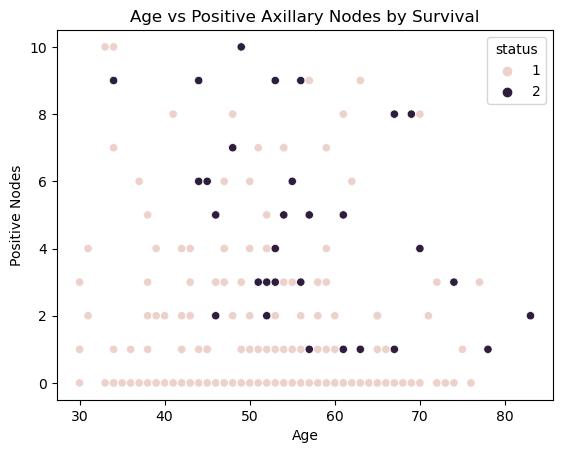

In [32]:
sns.scatterplot(x='age', y='pos_axillary_nodes', hue='status', data=data)
plt.title('Age vs Positive Axillary Nodes by Survival')
plt.xlabel('Age')
plt.ylabel('Positive Nodes')
plt.show()

### Observation

- The scatter plot shows that patients who **survived (Status = 1)** are **mostly clustered** around **zero to few positive nodes**, regardless of age.  
- Non-survivors (Status = 2) tend to have **more positive nodes**, especially among **middle-aged and older adults**, emphasizing **node burden over age**.  
- This suggests that **positive axillary node count** is a stronger determinant of survival than age, reinforcing its value in **prognostic assessment**.


---
<a name = Section9></a>
# **9. Summarization**
---

<a name = Section91></a>
### **9.1 Conclusion**

* The dataset represents a predominantly **middle-aged patient group**, with age distribution centered around **50–55 years**, and most surgeries occurring between **1958 and 1969**.
* The majority of patients had **zero or minimal positive axillary nodes**, indicating likely **early-stage detection**, while a small subset exhibited **advanced disease**.
* Survival outcomes are **favorable**, with over **75% of patients surviving 5 years or more**, suggesting effective treatment or early diagnosis.
* While **age** is not a strong survival predictor, the **number of positive axillary lymph nodes** shows a clear and **inverse relationship with survival**, making it the most significant clinical indicator.
* Survival trends across years show consistency with **occasional peaks and dips**, hinting at differences in treatment protocols, patient demographics, or data limitations.
* Overall, the data emphasizes that **lymph node involvement**, rather than age or operation year, is the **strongest driver of long-term survival** in breast cancer patients.

<a name = Section92></a>
### **9.2 Actionable Insights**
1. **Enhance early detection programs** to reduce axillary node involvement, as it directly correlates with **higher survival probability**.
2. Use **positive axillary node count as a primary feature** in risk stratification, clinical decision-making, and **predictive modeling** for breast cancer prognosis.
3. Apply **resampling or model balancing techniques** (e.g., SMOTE or stratified sampling) to handle **class imbalance** in survival outcomes during ML training.
4. Avoid over-reliance on **age or year of operation** as predictors, and instead focus on **pathological indicators** like lymph node status.
5. Explore further why **certain years (like 1965 and 1969)** had relatively lower survival rates—this may uncover **external factors or shifts in medical protocols**.
6. Educate clinicians that **node negativity is more impactful than age**, encouraging them to prioritize **node assessments** in prognosis evaluation and patient counseling.